# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [1]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [ ]:
# run this cell to upload file using GUI if you are using google colab

from google.colab import files
files.upload()

In [2]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
project_path = '/content/drive/MyDrive/Reception/'

In [45]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/prices.csv')
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


## Question 2

### Drop null
- Drop null values if any

In [47]:
df = df.dropna()

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [48]:
df = df.drop(['date','volume','symbol'], axis=1)

In [49]:
df.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


## Question 3

### Print the dataframe
- print the modified dataframe

In [50]:
df.head(10)

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002
5,115.510002,115.550003,114.500000,116.059998
6,116.459999,112.849998,112.589996,117.070000
7,113.510002,114.379997,110.050003,115.029999
8,113.330002,112.529999,111.919998,114.879997
9,113.660004,110.379997,109.870003,115.870003


In [51]:
df.shape

(851264, 4)

In [52]:
df.tail()

,open,close,low,high
851259,103.309998,103.199997,102.849998,103.930000
851260,43.070000,43.040001,42.689999,43.310001
851261,53.639999,53.529999,53.270000,53.740002
851262,44.730000,45.450001,44.410000,45.590000
851263,54.200001,53.630001,53.389999,54.480000


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [53]:
X = df.drop('close', axis=1)
y= df['close']

In [21]:
X

,open,low,high
0,123.430000,122.309998,126.250000
1,125.239998,119.940002,125.540001
2,116.379997,114.930000,119.739998
3,115.480003,113.500000,117.440002
4,117.010002,114.089996,117.330002
...,...,...,...
851259,103.309998,102.849998,103.930000
851260,43.070000,42.689999,43.310001
851261,53.639999,53.270000,53.740002
851262,44.730000,44.410000,45.590000


In [22]:
y

0         125.839996
1         119.980003
2         114.949997
3         116.620003
4         114.970001
             ...    
851259    103.199997
851260     43.040001
851261     53.529999
851262     45.450001
851263     53.630001
Name: close, Length: 851264, dtype: float64

## Question 4

In [54]:
from sklearn.model_selection import train_test_split 

### Create train and test sets
- Split the data into training and testing

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

In [25]:
X_train

,open,low,high
459012,73.070000,71.989998,73.379997
407430,62.110001,61.669998,62.200001
400836,46.060001,45.990002,46.599998
485466,71.730003,71.510002,72.160004
419905,91.470001,90.800003,91.769997
...,...,...,...
514041,40.270000,40.139999,40.619999
220532,47.009998,46.259998,47.330002
165158,36.119999,36.049999,37.090000
451283,27.510000,27.150000,27.590000


In [26]:
X_test

,open,low,high
794955,5.110000,5.080000,5.200000
426834,45.369999,44.689999,45.459999
605868,51.000000,49.930000,52.830002
503582,50.279999,48.840000,50.279999
255091,65.870003,65.410004,66.589996
...,...,...,...
749768,26.719999,26.080000,26.889999
506008,53.619999,53.029999,53.730000
53912,22.760000,22.360001,22.799999
751997,226.070007,225.759995,227.410004


## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



In [30]:
X_train

array([[ 0.02830842,  0.02418564,  0.02332991],
       [-0.10340815, -0.10106175, -0.10979373],
       [-0.29629601, -0.29136006, -0.29554774],
       ...,
       [-0.41575432, -0.41199566, -0.4087862 ],
       [-0.51922873, -0.52000938, -0.52190561],
       [-0.34076237, -0.34391059, -0.33829497]])

In [31]:
X_test

array([[-0.77826696, -0.77775845, -0.77855011],
       [-0.30361631, -0.30613571, -0.30812457],
       [-0.23724066, -0.2437448 , -0.22200839],
       ...,
       [-0.57017992, -0.57201137, -0.57289961],
       [ 1.82677062,  1.84980293,  1.81790449],
       [ 0.99736981,  0.99550017,  0.9852535 ]])

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [57]:
import numpy as np

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [33]:
y_train

array([72.160004, 62.029999, 46.290001, ..., 36.700001, 27.200001,
       42.07    ])

In [34]:
X_train.shape

(595884, 3)

In [35]:
y_train

array([72.160004, 62.029999, 46.290001, ..., 36.700001, 27.200001,
       42.07    ])

In [58]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)



## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([Flatten(), Dense(1,activation = 'linear')])

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [60]:
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [61]:
model.fit(X_train, y_train, epochs =50, batch_size=128, validation_data = (X_test,y_test))

Epoch 1/50
4656/4656 [==============================] - 5s 1ms/step - loss: 41.4018 - val_loss: 3.3159
Epoch 2/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9762 - val_loss: 3.4507
Epoch 3/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9680 - val_loss: 3.0613
Epoch 4/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9619 - val_loss: 3.7461
Epoch 5/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9544 - val_loss: 3.7893
Epoch 6/50
4656/4656 [==============================] - 5s 998us/step - loss: 0.9481 - val_loss: 3.8128
Epoch 7/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9438 - val_loss: 3.5222
Epoch 8/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9361 - val_loss: 3.7010
Epoch 9/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9279 - val_loss: 3.2210
Epoch 10/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [62]:
model.evaluate(X_test, y_test, verbose =0)

3.4042673110961914

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [63]:
model.predict(sc.transform([[123.430000, 122.30999, 116.250000]]))

array([[118.412445]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [64]:
import tensorflow as tf

(trainX,trainY),(testX,testY) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [65]:
trainX

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [66]:
u, indices = np.unique(trainY, return_inverse=True)
u

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

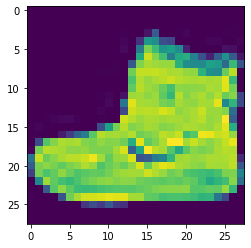

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(trainX[0].reshape(28,28))


In [ ]:
# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[trainY[100]])

Bag


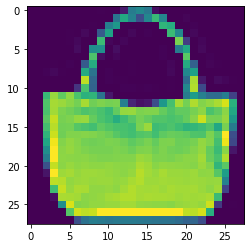

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(trainX[100].reshape(28,28))
print(class_names[trainY[100]])

### Change train and test labels into one-hot vectors

In [76]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10) 
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [77]:
trainY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Build the Graph

### Initialize model, reshape & normalize data

In [78]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [79]:
model1.add(tf.keras.layers.BatchNormalization())

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [80]:
#Hidden Layers
model1.add(tf.keras.layers.Dense(200, activation='relu'))
model1.add(tf.keras.layers.Dense(100, activation='relu'))

#Dropout Layer

model1.add(tf.keras.layers.Dropout(0.25))


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [81]:
model1.add(tf.keras.layers.Dense(10, activation= 'softmax'))

model1.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model1.fit(trainX,trainY,validation_data = (testX, testY), epochs=15, batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5065 - accuracy: 0.8187 - val_loss: 0.4076 - val_accuracy: 0.8508
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3966 - accuracy: 0.8561 - val_loss: 0.3797 - val_accuracy: 0.8598
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3569 - accuracy: 0.8692 - val_loss: 0.3778 - val_accuracy: 0.8711
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3392 - accuracy: 0.8755 - val_loss: 0.3520 - val_accuracy: 0.8744
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3175 - accuracy: 0.8833 - val_loss: 0.3560 - val_accuracy: 0.8771
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3002 - accuracy: 0.8889 - val_loss: 0.3418 - val_accuracy: 0.8804
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2890 - accuracy: 0.8919 - val_loss: 0.3350 - val_accuracy:

In [82]:
#Report Final Validation
model1.evaluate(testX, testY)

313/313 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8898


[0.4253021478652954, 0.8898000121116638]